<div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">
<h1>Machine Learning Lab 9: Cancer classification using SVM </h1>
Name: Deshmukh Pratik Bhushanrao <br>
Roll No: 2448513
</div>

In [13]:
!unzip archive.zip -d data

Archive:  archive.zip
  inflating: data/Testing/glioma_tumor/image(1).jpg  
  inflating: data/Testing/glioma_tumor/image(10).jpg  
  inflating: data/Testing/glioma_tumor/image(100).jpg  
  inflating: data/Testing/glioma_tumor/image(11).jpg  
  inflating: data/Testing/glioma_tumor/image(12).jpg  
  inflating: data/Testing/glioma_tumor/image(13).jpg  
  inflating: data/Testing/glioma_tumor/image(14).jpg  
  inflating: data/Testing/glioma_tumor/image(15).jpg  
  inflating: data/Testing/glioma_tumor/image(16).jpg  
  inflating: data/Testing/glioma_tumor/image(17).jpg  
  inflating: data/Testing/glioma_tumor/image(18).jpg  
  inflating: data/Testing/glioma_tumor/image(19).jpg  
  inflating: data/Testing/glioma_tumor/image(2).jpg  
  inflating: data/Testing/glioma_tumor/image(20).jpg  
  inflating: data/Testing/glioma_tumor/image(21).jpg  
  inflating: data/Testing/glioma_tumor/image(22).jpg  
  inflating: data/Testing/glioma_tumor/image(23).jpg  
  inflating: data/Testing/glioma_tumor/image

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [15]:
import os

for dirname, _, filenames in os.walk('data\Training'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Preprocessing:

In [43]:
import os
import cv2

path = r'data/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor': 2, 'meningioma_tumor': 3}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [17]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
pd.Series(Y).value_counts()

,count
1,827
2,826
3,822
0,395


In [18]:
X_updated = X.reshape(len(X), -1)

In [19]:
X.shape, X_updated.shape

((2870, 200, 200), (2870, 40000))

# Data Exploration and Visualization:

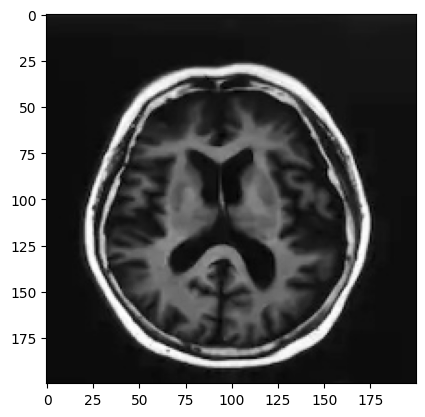

In [20]:
plt.imshow(X[0], cmap='gray')

# Model Building and Training:

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [22]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [23]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [24]:
from sklearn.svm import SVC

# Hyperparameter Tuning:

In [31]:
sv = SVC(kernel='sigmoid')
sv.fit(xtrain, ytrain)

print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.32229965156794427
Testing Score: 0.2926829268292683


In [32]:
sv = SVC(kernel='rbf')
sv.fit(xtrain, ytrain)

print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9425087108013938
Testing Score: 0.8292682926829268


In [33]:
sv = SVC(kernel='poly')
sv.fit(xtrain, ytrain)

print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9838850174216028
Testing Score: 0.8501742160278746


In [34]:
sv = SVC(kernel='linear')
sv.fit(xtrain, ytrain)

print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8240418118466899


# Prediction:

In [35]:
pred = sv.predict(xtest)

In [36]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  2,   7,  19,  27,  29,  40,  41,  42,  48,  60,  68,  72,  85,
         93, 104, 107, 113, 120, 125, 126, 127, 129, 135, 142, 149, 152,
        156, 163, 164, 165, 173, 179, 182, 194, 201, 204, 214, 218, 228,
        230, 233, 237, 239, 246, 248, 250, 253, 258, 264, 265, 269, 273,
        286, 287, 288, 302, 317, 323, 336, 339, 352, 355, 356, 359, 364,
        375, 376, 381, 392, 397, 399, 400, 402, 403, 405, 408, 409, 415,
        425, 427, 436, 438, 440, 444, 449, 455, 463, 476, 480, 483, 485,
        488, 493, 495, 503, 512, 516, 525, 536, 539, 570]),)

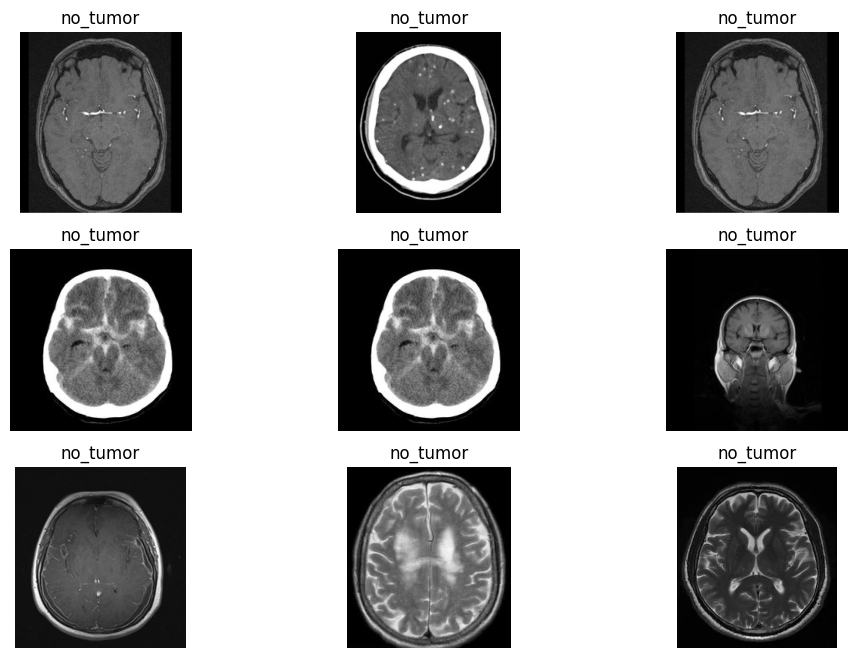

In [44]:
plt.figure(figsize=(12,8))
c=1
classes = {0 : 'no_tumor', 1: 'pituitary_tumor',2: 'glioma_tumor',  3 : 'meningioma_tumor'}


path=r'data/Testing/no_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(classes.get(p[0],'Unknown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

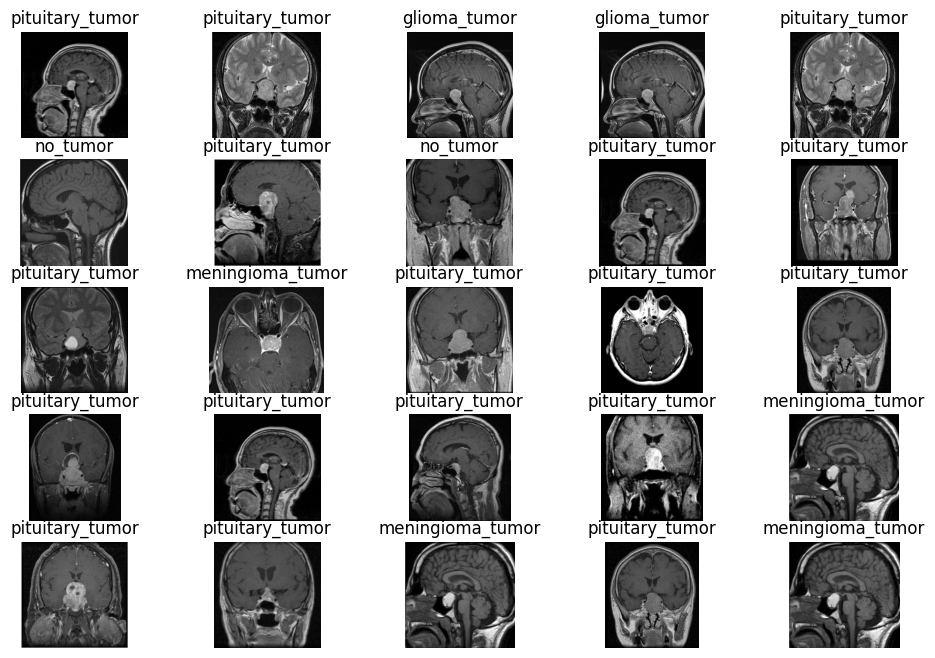

In [45]:
plt.figure(figsize=(12,8))
c=1
path=r'data/Testing/pituitary_tumor'
for i in os.listdir(path)[:25]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,5,c)
    plt.title(classes.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1;
  else:
    print(f"Failed to Load Image:{i}")
    plt.show()

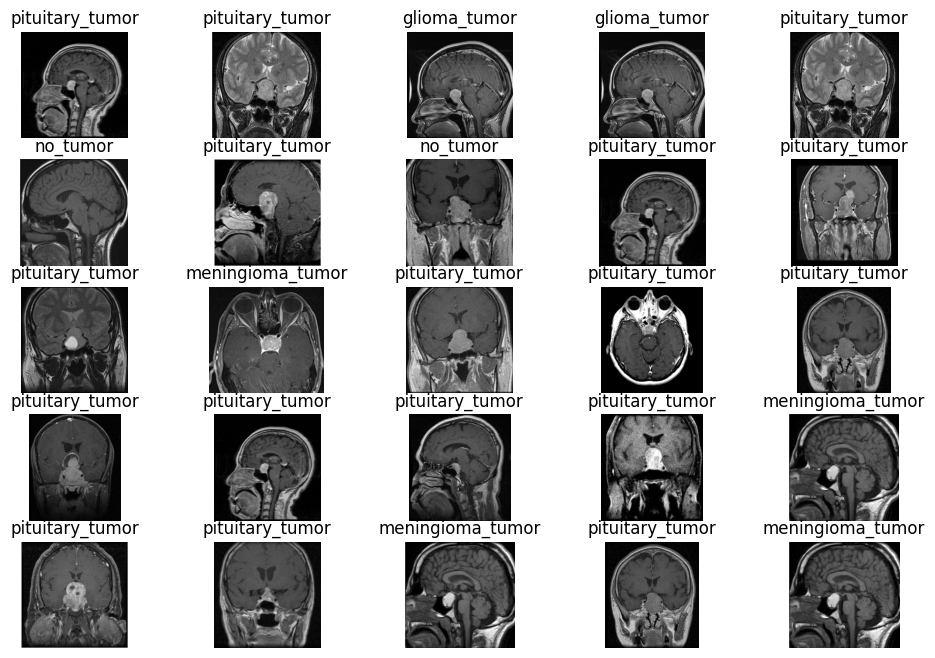

In [46]:
plt.figure(figsize=(12,8))
c=1
path=r'data/Testing/pituitary_tumor'
for i in os.listdir(path)[:25]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,5,c)
    plt.title(classes.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1;
  else:
    print(f"Failed to Load Image:{i}")
    plt.show()

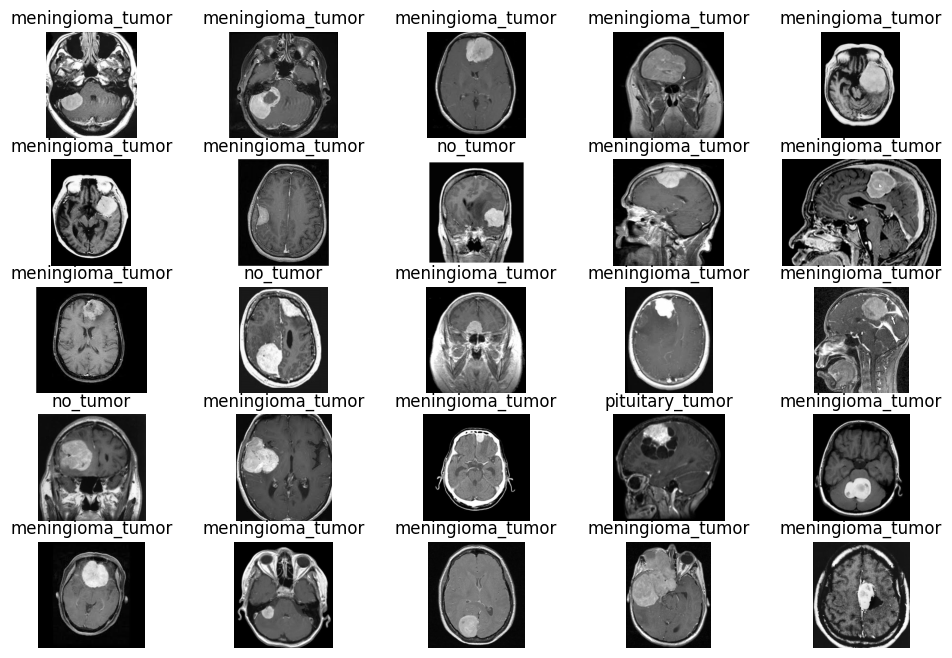

In [48]:
plt.figure(figsize=(12,8))
c=1
path=r'data/Testing/meningioma_tumor'
for i in os.listdir(path)[:25]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,5,c)
    plt.title(classes.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1;
  else:
    print(f"Failed to Load Image:{i}")
    plt.show()

# Model Evaluation

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

<Axes: >

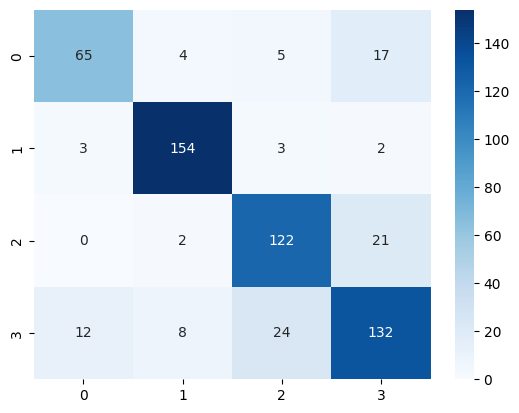

In [57]:
sns.heatmap(confusion_matrix(ytest, pred), annot=True, fmt='d', cmap='Blues')

In [59]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        91
           1       0.92      0.95      0.93       162
           2       0.79      0.84      0.82       145
           3       0.77      0.75      0.76       176

    accuracy                           0.82       574
   macro avg       0.82      0.81      0.82       574
weighted avg       0.82      0.82      0.82       574



In [75]:
import os
import cv2

path = r'data/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

xtrain = xtrain/255
xtest = xtest/255

sv = SVC(kernel='linear')
sv.fit(xtrain, ytrain)

print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9428571428571428


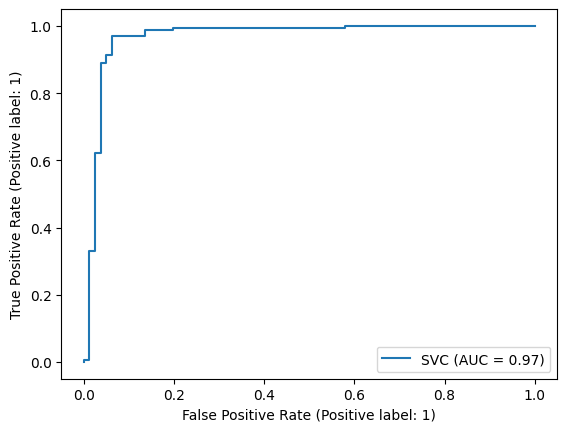

In [79]:
RocCurveDisplay.from_estimator(sv, xtest, ytest)
plt.show()

# Model Interpretation

In [90]:
sv.coef_[0]

array([-0.00490537, -0.0053542 , -0.00532606, ..., -0.00615709,
       -0.00505385, -0.00400225])

In [93]:
sv.intercept_

array([1.1211504])